In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#### List the files ######
# Adjust these if needed
root_dir_train = 'data/pickles/training'
root_dir_test = 'data/pickles/test'

train_files = sorted(os.listdir(root_dir_train))
test_files = sorted(os.listdir(root_dir_test))

print("Train files:", train_files)
print("Test files:", test_files)

Train files: ['Bearing1_1_DF.pkl', 'Bearing1_2_DF.pkl', 'Bearing2_1_DF.pkl', 'Bearing2_2_DF.pkl', 'Bearing3_1_DF.pkl', 'Bearing3_2_DF.pkl']
Test files: ['Bearing1_3_DF.pkl', 'Bearing1_4_DF.pkl', 'Bearing2_3_DF.pkl', 'Bearing2_4_DF.pkl', 'Bearing3_3_DF.pkl']


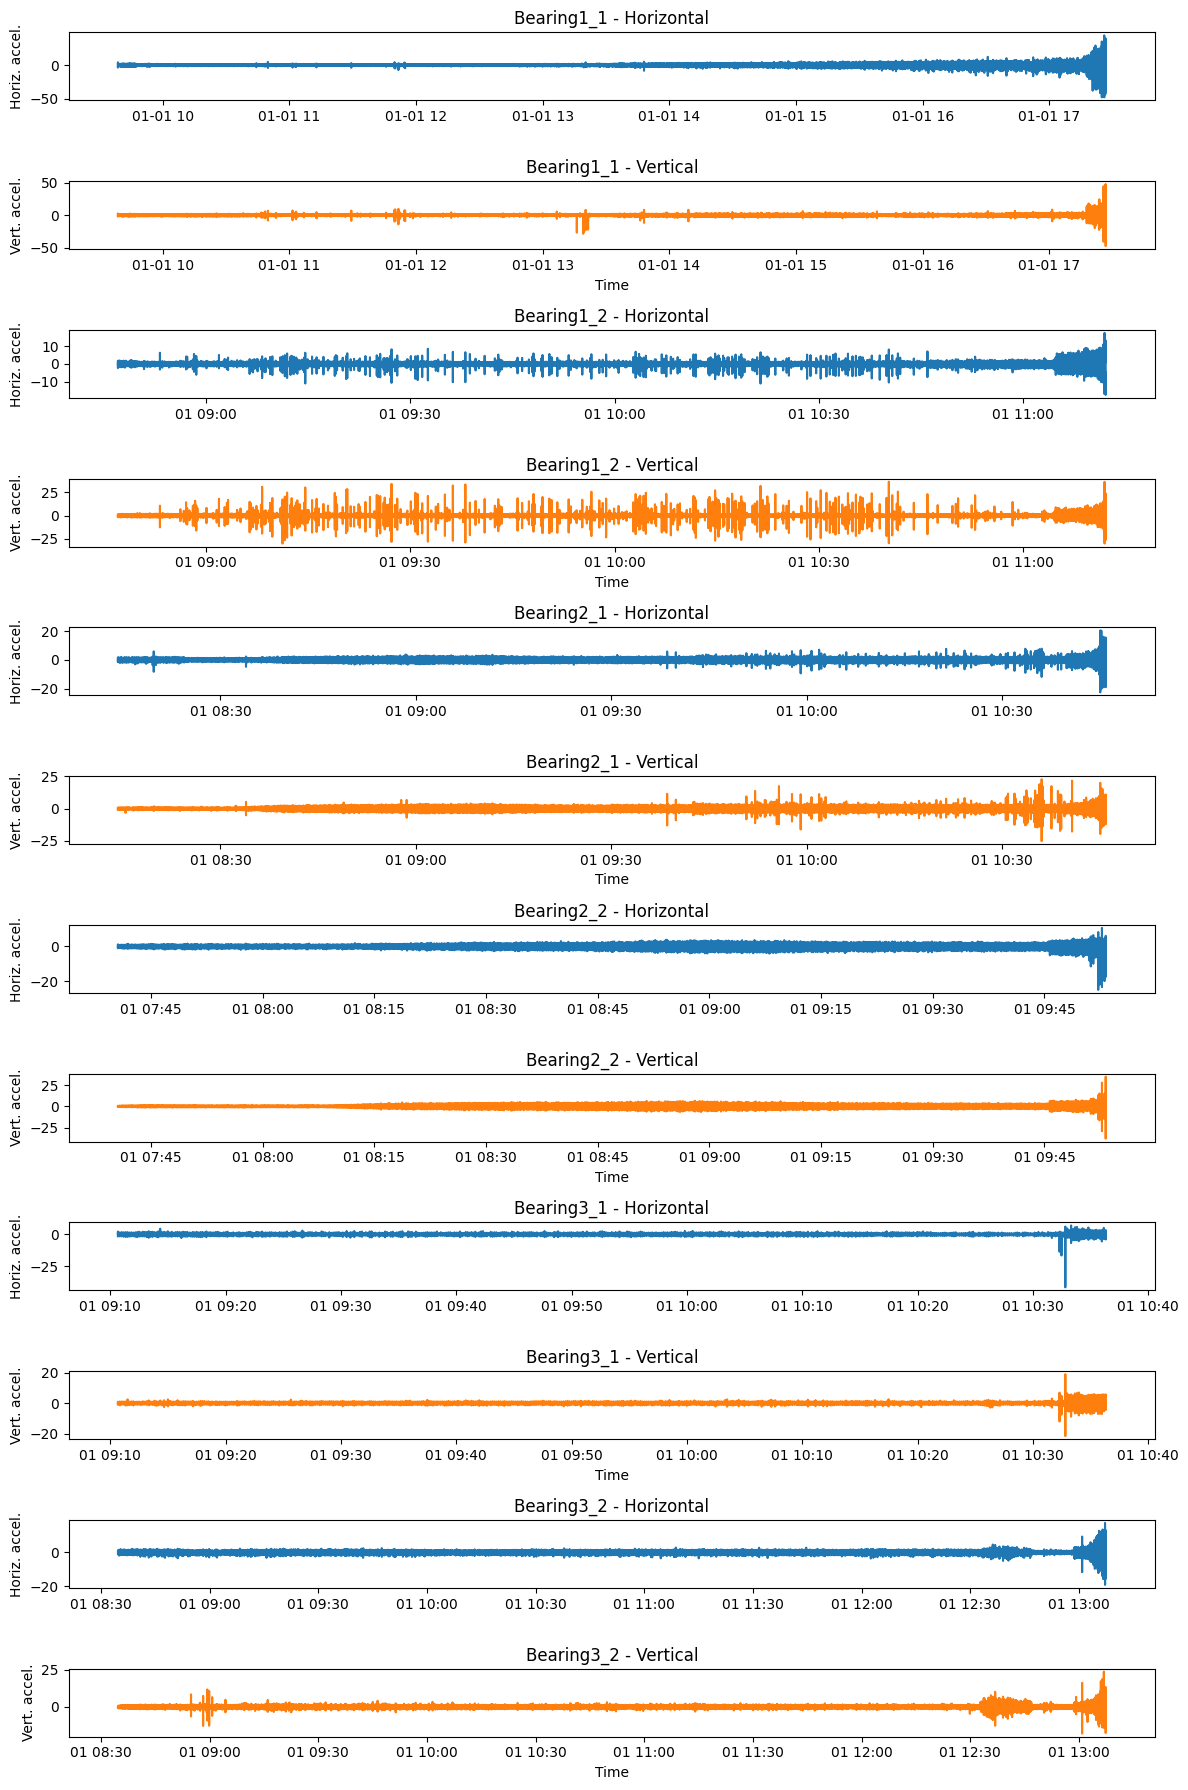

In [3]:
#### Plot the train files in the pronostia dataset!
files = train_files
root_dir = root_dir_train
num_files = len(files)

# Create figure: 2 subplots per file, stacked
fig, axs = plt.subplots(num_files * 2, 1, figsize=(12, 3*num_files), sharex=False)

if num_files == 0:
    print("No files found.")
else:
    for i, fname in enumerate(files):
        file_path = os.path.join(root_dir, fname)
        with open(file_path, 'rb') as f:
            df = pickle.load(f)
        
        # Top subplot for this file: Horizontal acceleration
        axs[i*2].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
        axs[i*2].set_ylabel('Horiz. accel.')
        axs[i*2].set_title(f"{fname[:10]} - Horizontal")
        
        # Bottom subplot for this file: Vertical acceleration
        axs[i*2 + 1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
        axs[i*2 + 1].set_ylabel('Vert. accel.')
        axs[i*2 + 1].set_title(f"{fname[:10]} - Vertical")
        axs[i*2 + 1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

In [4]:
#### Load one file and inspect #####
file_path = os.path.join(root_dir_train, files[4])

with open(file_path, 'rb') as f:
    df = pickle.load(f)

print(type(df))
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
                        Time  Horiz. accel.  Vert. accel.
0 1900-01-01 09:10:39.118790          0.338        -0.263
1 1900-01-01 09:10:39.118830          0.278         0.285
2 1900-01-01 09:10:39.118870          0.143         0.590
3 1900-01-01 09:10:39.118910          0.090        -0.193
4 1900-01-01 09:10:39.118940          0.035        -0.109
Index(['Time', 'Horiz. accel.', 'Vert. accel.'], dtype='object')


In [5]:
############## Plot raw signals of a single bearing!!!!#############
def plot_signals(df, title=None):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    axs[0].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
    axs[0].set_ylabel('Horizontal Accel.')
    axs[0].set_title(title or 'Horizontal and Vertical Acceleration vs Time')
    axs[1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
    axs[1].set_ylabel('Vertical Accel.')
    axs[1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

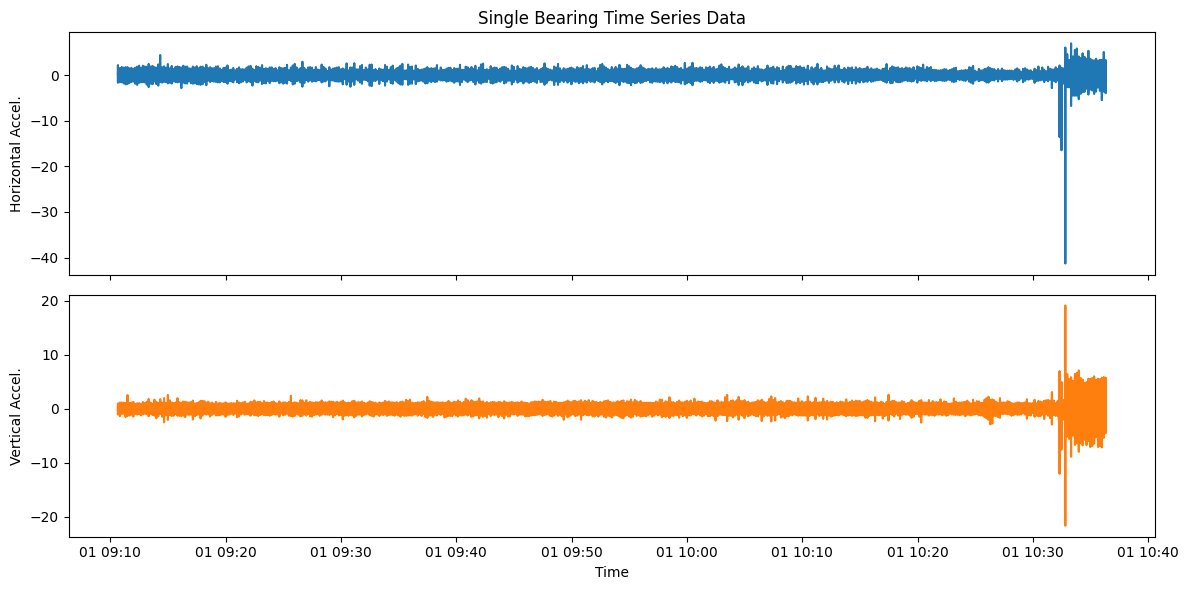

In [6]:
###### Plot raw signals from the first file ######
plot_signals(df, title='Single Bearing Time Series Data')